In [1]:
library(tidyverse)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
nodes_df <- read_tsv('../data/3.all_nodes//ppi.tsv.xz') 

degree_df <- nodes_df %>%
    select(-starts_with('name')) %>%
    gather('id_side', 'id', id_a:id_b) %>%
    group_by(.dots=c("id")) %>%
    summarize_at(vars(train, test_new), funs(sum)) %>%
    rename(biased=train, unbiased=test_new)

head(degree_df, 2)

Parsed with column specification:
cols(
  name_a = col_character(),
  name_b = col_character(),
  id_a = col_integer(),
  id_b = col_integer(),
  train = col_integer(),
  test_recon = col_integer(),
  test_new = col_integer()
)


id,biased,unbiased
0,55,1
1,3,2


In [3]:
vis_dists <- degree_df %>%
    gather('network', 'degree', biased:unbiased)

head(vis_dists, 2)

id,network,degree
0,biased,55
1,biased,3


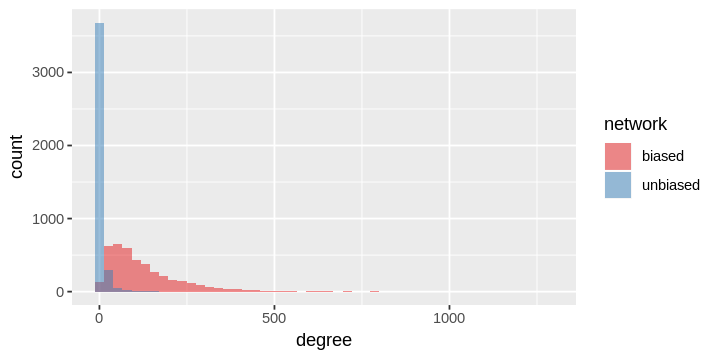

In [4]:
options(repr.plot.width=6, repr.plot.height=3)

source_target_degree_dists <- (
    ggplot(vis_dists, aes(x = degree, fill=network))
    + geom_histogram(position = position_identity(), alpha=0.5, bins = 50)
    + scale_fill_brewer(palette = "Set1")
)
ggsave(plot = source_target_degree_dists, filename = '../img/ppi_degree_dists.png', dpi = 500,
       width=6, height=3)
source_target_degree_dists

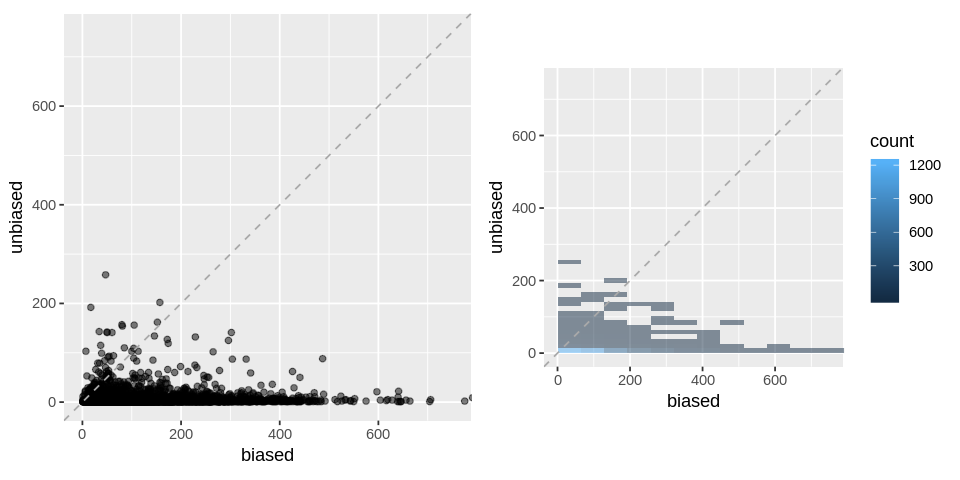

In [5]:
options(repr.plot.width=8, repr.plot.height=4)

scatter <- (
    ggplot(degree_df, aes(x = biased, y = unbiased))
    + geom_point(alpha=0.5)
    + geom_abline(slope = 1, intercept = 0, linetype='dashed', color='darkgrey')
    + coord_fixed(ratio = 1, ylim = c(0, 750), xlim = c(0, 750))
)

heatmap <- (
    ggplot(degree_df, aes(x = biased, y = unbiased))
    + geom_bin2d(alpha=0.5, bins=20)
    + geom_abline(slope = 1, intercept = 0, linetype='dashed', color='darkgrey')
    + coord_fixed(ratio = 1, ylim = c(0, 750), xlim = c(0, 750))
)

grid.arrange(scatter, heatmap, ncol = 2)

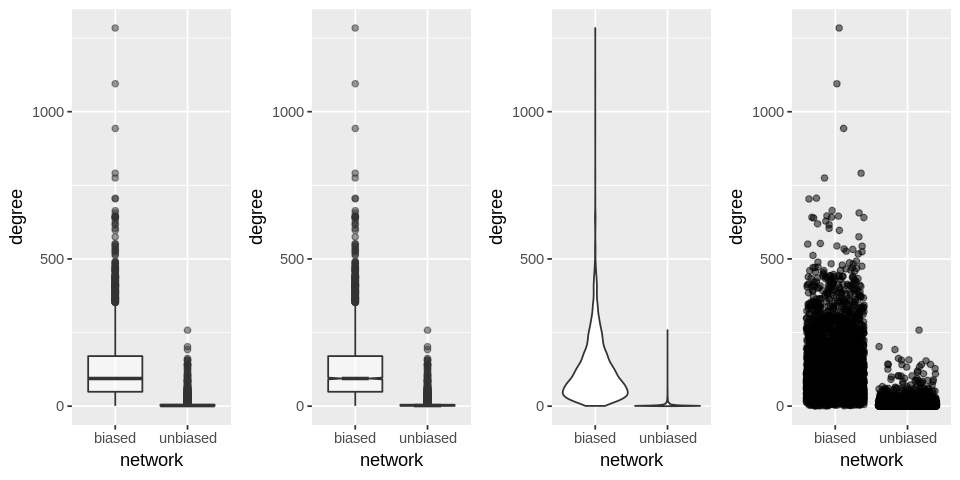

In [7]:
options(repr.plot.width=8, repr.plot.height=4)

box <- (
    ggplot(vis_dists, aes(x = network, y = degree))
    + geom_boxplot(alpha=0.5)
)

notched <- (
    ggplot(vis_dists, aes(x = network, y = degree))
    + geom_boxplot(notch = T, alpha=0.5)
    
)

violin <- (
    ggplot(vis_dists, aes(x = network, y = degree))
    + geom_violin(scale = "width")
)

jitter <- (
    ggplot(vis_dists, aes(x = network, y = degree))
    + geom_jitter(alpha=0.5)
)

grid.arrange(box, notched, violin, jitter, ncol = 4)